# **TP1 : De Flaubert à FlauBERT**


**RÉSUMÉ : Librairies utilisées et compétences** :

> Sur le traitement de texte :

-	Supprimer les caractères spéciaux d'un texte (**unidecode**)
-	Tokeniser une phrase (sent_tokenize de **nltk.tokenize**)
-	Détecter la langue d'un texte (detect de **languedetect**)
-	Lemmatisation (**spacy**)
-	Extraire les stopwords et la ponctuation (**spacy** et stopwords de **nltk.corpus**)
-	Extraire les noms propres d'un texte (**spacy**)
-	Extraire des adjectifs/verbes avec **spacy** et **stanza**
-	Extraire les mots importants dans un document par rapport à l'ensemble dans un corpus, avec TfidVectorizer (**scikit-learn**)
-	Tokéniser avec AutoTokenizer, AutoModel de **transformers**

> Opérations sur les fichiers:

-	Télécharger un texte grâce à son url (**urllib.request**)
-	Détecter l'encodage d'un fichier texte (**chardet**)

> Travail sur des corpus:

-	Romans de Flaubert
-	Corpus CIDRE (Corpus for Idiolectal Research) (romans XIXe)


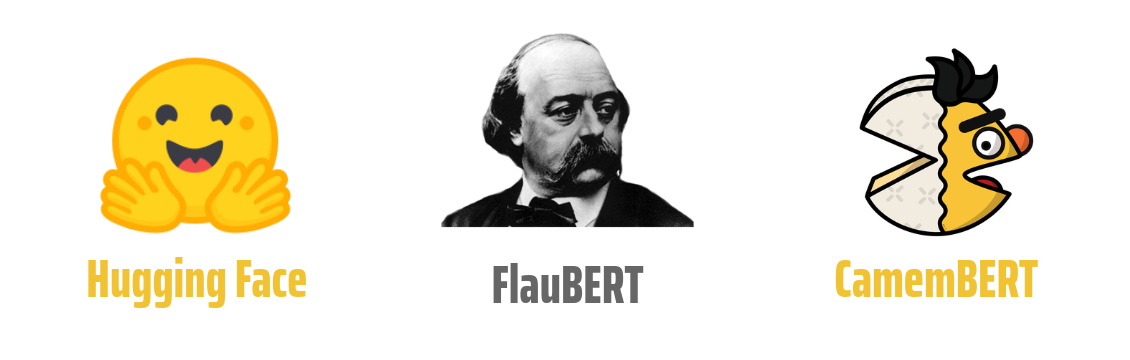

Professeur : Louis JOURDAIN

Lieu : INALCO, 2 rue de Lille, 75007

Quelques révisions du programme de première année, et au delà !

**Objectifs : **

1) Réviser les fondamentaux de l'écriture de scripts en python (structures de données et bonnes pratiques), et notamment:
* le téléchargement et l'ouverture de fichiers
* les fonctions essentielles de nettoyage du texte
* le stockage des informations pertinentes dans des structures de données adaptées

2) Savoir comment utiliser python pour répondre à des questions pratiques sur des données. Savoir réfléchir à la manière de découper une question abstraite (Ex: quel est le vocabulaire particulier de Flaubert par rapport aux autres romanciers du 19ième siècle ?) en une liste d'instructions que vous pouvez coder pour obtenir la réponse

3) Etudier (informatiquement) le style de Flaubert, car c'est un des meilleurs auteurs qui soient

# 1) préliminaires pour accéder à l'Education Sentimentale

Pour commencer par le commencement, il faut charger les textes de Flaubert.

In [ ]:
flaubert = {
    "Madame_Bovary": "https://www.gutenberg.org/cache/epub/14155/pg14155.txt",
    "L_Education_sentimentale": "https://www.gutenberg.org/cache/epub/49773/pg49773.txt",
    "Bouvard_et_Pecuchet": "https://www.gutenberg.org/cache/epub/14157/pg14157.txt", # Correct url modifié
    "Salammbô": "https://www.gutenberg.org/cache/epub/48881/pg48881.txt", # C'était inversé avec Trois Contes
    "Trois_Contes": "https://www.gutenberg.org/cache/epub/12065/pg12065.txt",
    "Un_Coeur_simple": "https://www.gutenberg.org/cache/epub/26812/pg26812.txt",
    "Dictionnaire_des_idees_recues": "https://www.gutenberg.org/cache/epub/14156/pg14156.txt"
}

* Pour ne pas poluer l'onglet du notebook, créez (en codant !!) un répertoire nommé "romans_Flaubert" dans le notebook

In [ ]:
!mkdir romans_Flaubert

* Faites la même chose en python en utilisant la librairie os

In [ ]:
import os
os.mkdir("./romans_Flaubert") # autre manière de créer un répertoire
# Erreur normale comme on a déjà créé le dossier à la cellule précédente

FileExistsError: [Errno 17] File exists: './romans_Flaubert'

* Téléchargez-y en utilisant la librairie urllib le texte de l'Education Sentimentale puis en utilisant la librairie os, saubegardez le roman dans le dossier que vous avez créé

In [ ]:
import urllib.request
import os

EduSen_telecharge = urllib.request.urlopen(flaubert["L_Education_sentimentale"])
EduSen = EduSen_telecharge.read().decode('utf-8')  # Décodage en UTF-8

chemin_fichier = os.path.join('romans_Flaubert', 'Education_Sentimentale') # générer le chemin complet pour le fichier dans ce répertoire
with open(chemin_fichier, 'w', encoding='utf-8') as fichier: # Sauvegarder le texte dans le fichier
    fichier.write(EduSen)



* Transformez votre série d'instructions en fonction (qui prend en entrée le nom d'un roman) et téléchargez tous le corpus

In [ ]:
def uploadcorpus(roman):
  url = flaubert[roman]
  upload_url = urllib.request.urlopen(url) #téléchargement du contenu de l'url
  text = upload_url.read().decode('utf-8')  # Décodage en UTF-8
  chemin_fichier = os.path.join('romans_Flaubert', roman)
  with open(chemin_fichier, 'w', encoding='utf-8') as fichier:
    fichier.write(text)

for roman in flaubert:
  uploadcorpus(roman)

* écrire une fonction  qui prend en entrée le nom d'un roman et renvoie le texte du roman stocké dans le fichier. La tester sur l'ES et afficher les 500 premières lignes

In [ ]:
def lire_roman(roman):
  chemin_fichier = os.path.join('romans_Flaubert', roman)
  if os.path.exists(chemin_fichier):
    with open(chemin_fichier, 'r', encoding='utf-8') as fichier:
      texte = fichier.read()
    return texte

# Que les 500 premières lignes
lignes = lire_roman('Madame_Bovary').splitlines()
for ligne in lignes[:500]:
    print(ligne)

# 2) Nettoyer l'oeuvre du maître


Le texte que nous avons téléchargé n'est pas de la meilleure qualité. Comme vous le voyez on tombe sur un passage en anglais...  Réglons cela !



* Vérifiez que le texte était bien en encodage UTF-8 (vous pouvez utiliser la librairie chardet)

In [ ]:
import chardet # = pour détecter l'encodage des fichiers et des chaînes de caractères

chemin_fichier = os.path.join('romans_Flaubert', 'Madame_Bovary')
with open(chemin_fichier,'rb') as fichier:
  texte = fichier.read()
encodage = chardet.detect(texte) # print : {'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}
print(encodage['encoding'])


UTF-8-SIG


* Enlevez tous les caractères spéciaux (ne conserver que les caractères latins). Quelle librairie pourrait le faire le plus facilement ?



In [ ]:
!pip install unidecode
# unidecode permet de convertir des caractères Unicode en leurs équivalents ASCII
# les plus proches. En d'autres termes, elle normalise les caractères Unicode
# (qui peuvent inclure des accents, des diacritiques, etc.) en caractères ASCII
# simples.

In [ ]:
from unidecode import unidecode

def latin(roman):
  return unidecode(roman)

for roman in flaubert.keys(): # liste des clés du dico flaubert, ie le nom des romans
  latin(roman)

* Enlevez tous les contenus textuels qui ne sont pas l'oeuvre de Flaubert (vous pouvez garder les préfaces, que vous encoderez le cas échéant avec la clé "preface" dans la question suivante).
Indice : ils sont en anglais !

In [ ]:
!pip install nltk langdetect
# nltk : la tokenisation, le stemming, le tagging, la parsing, la classification,...
# langdetect : spécialisée dans la détection de langue (vs nltk). Elle utilise
# un modèle statistique pour identifier la langue d'un texte en se basant sur
# les caractères et les structures du texte.

In [ ]:
import nltk
from langdetect import detect
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

In [ ]:
def fr(texte):
  '''exclut l'anglais : ne prend que le texte français'''
  L = []
  phrases = sent_tokenize(texte)
  for phrase in phrases:
    langue = detect(phrase)
    if langue != 'en': # == 'fr'
      L.append(phrase)
  texte_fr = ' '.join(L) # Recomposer le texte sans les phrases en anglais
  return texte_fr

# à utiliser après découpage chapitre

In [ ]:
texte = latin(lire_roman('Madame_Bovary'))
print(texte)

In [ ]:
texte = latin(lire_roman('L_Education_sentimentale'))
print(texte)

# 3) Organiser l'oeuvre

L'objectif de cette partie sera de stocker de manière efficace toute l'oeuvre de Flaubert dans la variable "oeuvre_Flaubert" : un dictionnaire de dictionnaires ayant comme clé le titre du livre (sans accent) et en valeur un dictionnaire ayant comme clé le numéro de chapitre (un chiffre romain) et retournant le texte de ce chapitre.

Remarquez que chaque chapitre est noté par un chiffre romain et est précédé et suivi de deux sauts de ligne.


* écrivez une fonction prenant en entrée le texte d'un roman et effectuant un split sur les séquences du type deux sauts de ligne, une ligne avec du texte, deux sauts de ligne, et qui renvoie un dictionnaire associant la chaîne de caractère contenue entre les sauts de ligne et lui associe le texte avant la prochaine séparation


In [ ]:
# on veut créer un dico de dicos tel que:
# dico = {Madame_Bovary : d_Madame_Bovary, Salammbo : d_Salammbo, ...}
# et
# d_Madame_Bovary = {I. : Il était une fois..., II. Le lendemain,...}

**Mes notes/observations relatives à cette fonction** :

- but : splitter les chapitres selon le double saut de ligne
- problème : il peut y avoir deux sauts de ligne à d'autres endroits dans le texte littéraire
- solution : splitter sur [double saut de ligne - expression régulière des chiffres romains - double saut de ligne]

- autre problème : on a plusieurs parties donc plusieurs fois un chapitre 'I', donc les prochains chapitres "I" ne seront pas ajoutés en plus au dictionnaire comme ils correspondent à la première clé
- solution : ajouter un point devant le chiffre romain du chapitre si c'est la deuxième partie, un autre point encore si c'est la 3e partie, etc. : exemple : [I, II, III, .I, II, ..I, ..II, ..III, ..IV]


In [ ]:
# fonction modifiée suite à l'ajout de l'url de Bouvard qui écrit les chapitres différemment des autres oeuvres de Flaubert
# donc ajout d'une condition if re.search, elif re.search pour traiter tous les cas
# pareil pour Trois Contes qui contient une identation spéciale à chaque numéro de chapitre

import re

def split_chap(texte):
    '''Split sur les séquences du type deux sauts de ligne, une ligne avec du texte, deux sauts de ligne,
    et qui renvoie un dictionnaire associant la chaîne de caractère contenue entre les sauts de ligne
    et lui associe le texte avant la prochaine séparation.
    d = {'I': "Il était une fois...", '.I': "Nouveau chapitre dans la deuxième partie..." }'''

    if re.search(r'\n\n([IVXLCD]+)\n\n', texte):
        sections = re.split(r'\n\n([IVXLCD]+)\n\n', texte.strip())
    elif re.search(r'\nCHAPITRE ([IVXLCDM]+)\n\n', texte):
        sections = re.split(r'\nCHAPITRE ([IVXLCDM]+)\n\n', texte.strip()) # pour BOUVARD ET PECUCHET
    elif re.search(r'([IVXL]+)\n', texte):
        sections = re.split(r'([IVXL]+)\n', texte.strip()) # pour TROIS CONTES

    d = {}  # Dictionnaire pour stocker les chapitres
    chapitre_suffix = {}  # Dictionnaire pour suivre les suffixes des chapitres

    for i in range(1, len(sections), 2):
        titre_chapitre = sections[i].strip()  # titre du chapitre
        contenu_chapitre = sections[i + 1].strip()  # le contenu correspondant
        contenu_chapitre = contenu_chapitre.replace('\n', ' ') # remplacer les sauts de ligne par un espace

        # Vérifier si c'est un chapitre déjà rencontré (pour les autres parties)
        if titre_chapitre in d:
            # Incrémente le compteur pour les chapitres déjà vus
            if titre_chapitre not in chapitre_suffix:
                chapitre_suffix[titre_chapitre] = 1  # Démarre le suffixe à 1
            else:
                chapitre_suffix[titre_chapitre] += 1  # Incrémente le suffixe

            # Crée le nouveau titre avec des points
            titre_chapitre = '.' * chapitre_suffix[titre_chapitre] + titre_chapitre  # Ajoute des points

        d[titre_chapitre] = contenu_chapitre

    return d

texte = lire_roman('L_Education_sentimentale')
dico = split_chap(texte)
print(dico.keys())

dict_keys(['I', 'II', 'III', 'IV', 'V', 'VI', '.I', '.II', '.III'])


In [ ]:
texte = lire_roman('Bouvard_et_Pecuchet')
dico = split_chap(texte)
print(dico.keys())

dict_keys(['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X'])


In [ ]:
texte = lire_roman('Madame_Bovary')
dico = split_chap(texte)
print(dico.keys())

dict_keys(['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', '.I', '.II', '.III', '.IV', '.V', '.VI', '.VII', '.VIII', '.IX', 'X', 'XI', 'XII', 'XIII', 'XIV', 'XV', '..I', '..II', '..III', '..IV', '..V', '..VI', '..VII', '..VIII', '..IX', '.X', '.XI'])


In [ ]:
texte = lire_roman('Trois_Contes')
dico = split_chap(texte)
print(dico.keys())

dict_keys(['I', 'II', 'III', 'IV', 'V', '.I', '.II', '.III', '..I', '..II', '..III'])


In [ ]:
texte = lire_roman('Salammbô')
dico = split_chap(texte)
print(dico.keys())

dict_keys(['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII', 'XIV', 'XV'])


In [ ]:
texte = lire_roman('Un_Coeur_simple')
dico = split_chap(texte)
print(dico.keys())

dict_keys(['I', 'II', 'III', 'IV', 'V'])


On a une fonction **split_chap qui fonctionne** pour toutes les oeuvres de Flaubert !

* à votre avis, faut-il mieux utiliser la fonction qui enlève l'anglais avant de procéder au découpage par chapitre ou après sur chaque chapire ? Pourquoi ? Essayez les deux et commentez les résultats

**Réponse** :

Il faut utiliser la fonction qui enlève l'anglais après le découpage par chapitre car cette fonction retire les sauts de ligne, et empêche donc le correct découpage.
En essayant les deux, j'ai remarqué que certains chiffres romains n'étaient pas extraits lors de la fonction split_chap car les sauts de ligne précédant ces chiffres ont été éliminés, donc ils se retrouvaient à la fin d'un chapitre, collé à la dernière phrase, et étaient donc incapables d'être reconnus.

* Pour le dictionnaire des idées reçues, puisque c'est déjà un  dictionnaire dans la forme, stockez-le dans un dictionnaire qui associe à chaque mot sa  définition

Repérez que les mots définis sont en lettres capitales.
Regardez comment se structure le texte et écrivez une fonction pour traiter le dictionnaire spécifiquement

In [ ]:
#fonction créant dictionnaire pour le roman Dictionnaire des idées reçues

def Dictionnaire_des_idees_recues(texte):
  d = {}
  # on split le texte en paragraphe (chaque saut de ligne, chaque fois que nouvelle définition)
  txt = texte.split('\n\n')
  for para in txt:
    if ':' in para: # pour exclure les lignes où il n'y a que le lettres 'A', 'B',...
      para = para.split(':',1) # or il y a parfois ':' DANS la définition à droite, d'où le '1' étant l'arg "maxpslit = 1", limitant la division à 1 seul séparateur
      if para[0].isupper(): # si le mot avant ':' est en majuscule
        d[para[0]] = para[1]
  d.popitem() # on enlève le dernier élément qui est de l'anglais, comme toute fin d'oeuvre de nos url
  return d

chemin_fichier = os.path.join('romans_Flaubert', 'Dictionnaire_des_idees_recues')
with open(chemin_fichier,'r') as fichier:
  texte = fichier.read()
dico_idees = Dictionnaire_des_idees_recues(texte)
print(dico_idees)


In [ ]:
print(list(dico_idees.items())[-1]) # c'est bien le dernier terme

('YVETOT', ' Voir Yvetot et mourir! (v. Naples et Séville)')


In [ ]:
print(dico_idees.keys())

* écrivez un code qui traite tout le corpus

In [ ]:
# Code qui traite tout le corpus

oeuvre_Flaubert = {}
for roman in flaubert:
  texte = latin(lire_roman(roman)) # on convertit le texte (généré grâce à lire_roman) en caractère latin
  dico_un_roman = split_chap(texte)
  if roman == 'Dictionnaire_des_idees_recues':
    dico_un_roman = Dictionnaire_des_idees_recues(texte)
  # maintenant il faut ajouter ces dico à un gros dico contenant toutes les oeuvres de Flaubert
  oeuvre_Flaubert[roman] = dico_un_roman

* Pour vérifier que tout fonctionne bien, cherchez:
- la liste des textes stockés
- le chapitre 9 de Madame Bovary
- le texte d'un Coeur Simple
- la définition du mot "introduction" dans le Dictionnaire des idées reçues.

In [ ]:
oeuvre_Flaubert.keys() # ok

dict_keys(['Madame_Bovary', 'L_Education_sentimentale', 'Bouvard_et_Pecuchet', 'Salammbô', 'Trois_Contes', 'Un_Coeur_simple', 'Dictionnaire_des_idees_recues'])

In [ ]:
oeuvre_Flaubert["Madame_Bovary"]["IX"] # ok

In [ ]:
" ".join(oeuvre_Flaubert["Un_Coeur_simple"].values()) # ok

In [ ]:
oeuvre_Flaubert['Dictionnaire_des_idees_recues'].keys() # ok

In [ ]:
oeuvre_Flaubert["Dictionnaire_des_idees_recues"]['INTRODUCTION'] # ok

In [ ]:
oeuvre_Flaubert["Bouvard_et_Pecuchet"]['IX'] # ok

In [ ]:
oeuvre_Flaubert["Trois_Contes"]['..III'] # ok

# 4) Des questions simples sur un Coeur Simple

* Quelle est l'oeuvre la plus longue de Flaubert ? La plus courte ? Leur longueur moyenne ?

In [ ]:
# Fonction pour générer un dictionnaire {'roman' : nb total de mots}
def dico_len(dico_general):
  dico_nb_mots = {}
  for roman in dico_general:
    dico_un_roman = oeuvre_Flaubert[roman]
    total_nb_mots = 0
    for chap in dico_un_roman.values():
      total_nb_mots += len(chap.split())
    dico_nb_mots[roman] = total_nb_mots
  return dico_nb_mots

dico_longueur = dico_len(oeuvre_Flaubert)
dico_longueur

{'Madame_Bovary': 115319,
 'L_Education_sentimentale': 68875,
 'Bouvard_et_Pecuchet': 88685,
 'Salammbô': 109958,
 'Trois_Contes': 32591,
 'Un_Coeur_simple': 14025,
 'Dictionnaire_des_idees_recues': 9948}

In [ ]:
maxi = max(dico_longueur, key=dico_longueur.get)
mini = min(dico_longueur, key=dico_longueur.get)
mean = sum(dico_longueur.values()) / len(dico_longueur) if dico_longueur else 0

print(f"min {mini} {dico_longueur[mini]}")
print(f"max {maxi} {dico_longueur[maxi]}")
print(f"mean {mean:.2f}") # .2f = pour afficher que 2 décimales

min Dictionnaire_des_idees_recues 9948
max Madame_Bovary 115319
mean 62771.57


In [ ]:
# (si on veut trouver le deuxième minimum par exemple)
valeurs_triees = sorted(set(dico_longueur.values()))
deuxieme_min = valeurs_triees[1]
cle = [k for k, v in dico_longueur.items() if v == deuxieme_min][0]
print(f"min {deuxieme_min} {cle}")

min 14025 Un_Coeur_simple


Autre manière de faire avec l'astérisque * :

In [ ]:
mini, second_min, *middle, maxi = sorted(set(dico_longueur.values()))
second_min

14025

Quelle oeuvre comporte le plus de chapitre ? (On exclue bien sur le dictionnaire)

In [ ]:
nb_chap = {}
for roman, dico_chap in oeuvre_Flaubert.items():
  if roman != 'Dictionnaire_des_idees_recues':
    nb_chap[roman] = len(dico_chap)
print(nb_chap)

print("(Oeuvre avec le moins de chapitre :",min(nb_chap,key=nb_chap.get), ")")
print("L'oeuvre avec le plus de chapitres est", max(nb_chap,key=nb_chap.get), "avec", max(nb_chap.values()), "chapitres.")

{'Madame_Bovary': 35, 'L_Education_sentimentale': 9, 'Bouvard_et_Pecuchet': 10, 'Salammbô': 15, 'Trois_Contes': 11, 'Un_Coeur_simple': 5}
(Oeuvre avec le moins de chapitre : Un_Coeur_simple )
L'oeuvre avec le plus de chapitres est Madame_Bovary avec 35 chapitres.


* Combien y-a-t-il de phrases fans "Un Coeur Simple" ?

In [ ]:
texte_un_coeur_simple = ' '.join(oeuvre_Flaubert['Un_Coeur_simple'].values())  # on concatène les chapitres
nombre_phrases = texte_un_coeur_simple.count('.')  # compter les points pour estimer le nombre de phrases
print(f"Le nombre de phrases dans 'Un Coeur simple' est : {nombre_phrases}")

Le nombre de phrases dans 'Un Coeur simple' est : 864


* Combien-y-a-t-il de mots dans "Un Coeur Simple" ?

In [ ]:
texte_un_coeur_simple = ' '.join(oeuvre_Flaubert['Un_Coeur_simple'].values())
nombre_mots = len(texte_un_coeur_simple.split())
print(f"Le nombre de mots dans 'Un Coeur simple' est : {nombre_mots}")

Le nombre de mots dans 'Un Coeur simple' est : 14025


* Et de mots uniques ?  Enlevez les mots les plus fréquents (les stopwords de nltk suffiront)

In [ ]:
import nltk
from nltk.corpus import stopwords
# télécharger les stopwords
nltk.download('stopwords')

In [ ]:
texte_un_coeur_simple = ' '.join(oeuvre_Flaubert['Un_Coeur_simple'].values())  # concaténer les chapitres
mots = texte_un_coeur_simple.split()  # spliter le texte en mots

stop_words = set(stopwords.words('french'))

# Filtrer les mots pour obtenir les mots uniques, en excluant les stopwords
mots_uniques = set(word.lower() for word in mots if word.lower() not in stop_words)

nombre_mots_uniques = len(mots_uniques)
print(f"Le nombre de mots uniques dans 'Un Coeur simple' (hors stopwords) est : {nombre_mots_uniques}")

Le nombre de mots uniques dans 'Un Coeur simple' (hors stopwords) est : 4796


* Et de lemmes uniques ? ... Gardons ça pour la partie suivante

# 5) Lemmatisation sentimentale

* Récupérez le texte de l'Education sentimentale

In [ ]:
texte_edu_sen = fr(latin(lire_roman('L_Education_sentimentale'))).replace("\n", " ") # texte excluant l'anglais et les caractères spéciaux, et remplaçant les sauts de ligne par un espace

* https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer Cette gentille personne a pris de son temps pour coder un lemmatiseur. Faites en sorte de le charger puis créer une fonction qui l'utilise et appliquez là à notre texte  

In [ ]:
!pip install git+https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git

**Remarque** :

Ce lemmatiseur demande de fournir le POS : la méthode lemmatize accepte un second argument, le POS tag. Si ce tag n'est pas fourni, le mot sera considéré comme 'n' (nom) par défaut.

In [ ]:
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
lemmatizer = FrenchLefffLemmatizer()

In [ ]:
#  Fonction qui utilise le lemmatiseur et l'appliquer au texte
def lemmatize_text(text):
    lemmatizer = FrenchLefffLemmatizer()
    tokens = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(token, pos='all') for token in tokens]
    lemma = [word_list[0][0] for word_list in lemmatized_words if word_list]
    #print(lemma)
    return ' '.join(lemma)

# On a dû rajouter la ligne 'lemma=' pour que la fonction join s'applique correctement, car sans 'lemma=',
# lemmatized_words donne une liste de liste de tuple (par exemple [[('le', 'det'), ('le', 'cla'), ('Les', 'np')], [('étudiant', 'adj'), ('étudiant', 'nc')]]
# donc il faut n'extraire que le premier élément du premier tuple de chaque liste de résultats.

# test
text = "Les étudiants aiment apprendre de nouvelles choses."
lemmatized_text = lemmatize_text(text)
print(lemmatized_text)

le étudiant aimer apprendre de nouveau chose .


**Analyse** :

Le lemmatiseur fonctionne bien ici, car on a tokenisé la phrase en amont.
On peut appliquer cette fonction au texte de l'éducation sentimentale.

In [ ]:
print(lemmatize_text(texte_edu_sen))

**Analyse** :

Correcte lemmatisation

* Etudiez les résultats de cette lemmatisation ? Qu'en pensez-vous ?
Essayez de lemmatiser quelques mots (indice : essayez des verbes conjugués)

In [ ]:
print(lemmatizer.lemmatize("mangeront")) # incorrect car traite ce verbe comme un nom 'n' par défaut sans précision de pos
print(lemmatizer.lemmatize("mangeront",pos='all')) # correct
print(lemmatizer.lemmatize("mangeront",pos='v')) # correct
print(lemmatizer.lemmatize("chevaux",pos='all')) # ne marche pas bien
print(lemmatizer.lemmatize("elle",pos='all')) # "il"
print(lemmatizer.lemmatize("jardins",pos='all')) # correct

mangeront
[('manger', 'v')]
manger
[('chevau', 'nc'), ('chevaux', 'nc')]
[('il', 'cln'), ('lui', 'pro')]
[('jardin', 'nc')]


**Analyse** :

Correcte lemmatisation (quand pos est précisé, sinon, sans pos='all', pos='n' par défaut).

* Oui, je suis d'accord, il faut aller chercher un autre lemmatiseur...
Prenons simplement celui fourni par Spacy, la librairie NLP à tout faire...




In [ ]:
!pip3 install spacy
!python3 -m spacy download fr_core_news_md

In [ ]:
import spacy

In [ ]:
# on charger le modèle français
nlp = spacy.load("fr_core_news_md")

* Le pipeline de Spacy crée un objet token.  Quels sont ces champs ? Lequel devez-vous récupérer pour répondre à la question ?

In [ ]:
# on créer un objet doc avec un texte exemple
doc = nlp("Ceci est une phrase d'exemple.")

# on prend le premier token du document
token = doc[0]

# on obtient tous les attributs et méthodes du token
print(dir(token))

['_', '__bytes__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', 'ancestors', 'check_flag', 'children', 'cluster', 'conjuncts', 'dep', 'dep_', 'doc', 'ent_id', 'ent_id_', 'ent_iob', 'ent_iob_', 'ent_kb_id', 'ent_kb_id_', 'ent_type', 'ent_type_', 'get_extension', 'has_dep', 'has_extension', 'has_head', 'has_morph', 'has_vector', 'head', 'i', 'idx', 'iob_strings', 'is_alpha', 'is_ancestor', 'is_ascii', 'is_bracket', 'is_currency', 'is_digit', 'is_left_punct', 'is_lower', 'is_oov', 'is_punct', 'is_quote', 'is_right_punct', 'is_sent_end', 'is_sent_start', 'is_space', 'is_stop', 'is_title', 'is_upper', 'lang', 'lang_', 'left_edge', 'lefts', 'lemma', 'lemma_', 'lex', 'lex_id', 'like_email', 'like

In [ ]:
# test spacy lemmatisation

nlp = spacy.load("fr_core_news_md")
exemple = "Les chats sont des animaux très mignons."

# Traiter le texte
doc = nlp(exemple)

# Extraire les lemmes de chaque token
lemmatized_text = [token.lemma_ for token in doc] # token.lemma = le lemme en tant qu'identifiant numérique interne, alors que token.lemma_ = version TEXTE du lemme

print("Texte original :", text)
print("Texte lemmatisé :", " ".join(lemmatized_text))

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Texte original : Les chats sont des animaux très mignons.
Texte lemmatisé : le chat être un animal très mignon .


* écrire une fonction prenant en entrée un texte et renvoyant la distribution des lemmes

In [ ]:
# faisons cela pour le texte de l'Education sentimentale : texte_edu_sen

from collections import Counter
doc = nlp(texte_edu_sen)
lemmatized_text = [token.lemma_ for token in doc]
lemme_counter = Counter(lemmatized_text) # compter les occurences des lemmes
lemme_occurrences = lemme_counter.most_common() # onvertir en une liste de tuples (lemme, nb occurence)
print(lemme_occurrences)

* Commentez les premiers éléments de cette liste. Comment appelle-t-on ce genre de mots ? Que faire ? Modifiez la fonction en conséquence.



**Réponse** :

Les premiers éléments de la liste sont des mots très fréquents de la langue française (articles (in)définis 'le'/'un', préposition 'de', auxiliaire 'avoir', ponctuation ',' '.').

Ce sont des **mots vides** ou **stop words**. Ce sont des mots fonctionnels qui n'apportent pas beaucoup de valeur sémantique dans les textes.

Ainsi, pour améliorer notre analyse, on va supprimer les stop words et la ponctuation. Spacy permet de détecter les stop words avec **is_stop** et de filtrer les **tokens non-alphabétiques** (donc la ponctuation notamment).

In [ ]:
# modifions le code précédent :

doc = nlp(texte_edu_sen)
# On extrait les lemmes de chaque token, en EXCLUANT les stop words et la ponctuation
lemmatized_text = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

lemme_counter = Counter(lemmatized_text)
lemme_occurrences = lemme_counter.most_common()
print(lemme_occurrences)


Super!

# 6) Les adjectifs d'Emma

Le but de cette question est de trouver tous les adjectifs utilisés par Flaubert pour décrire Mme Bovary.

* Chargez le texte de Mme Bovary

In [ ]:
texte_bovary = fr(latin(lire_roman('Madame_Bovary'))).replace("\n", " ") # texte excluant l'anglais et les caractères spéciaux, et remplaçant les sauts de ligne par un espace
texte_bovary

Quels sont tous les personnages principaux de l'oeuvre ? Indice : utiliser un système de NER
Quels sont tous les noms du personnage principal ? Commentez les résultats.
On ne fera pas mieux ce n'est pas l'essentiel.

Notes:

NER = système de reconnaissance d'entitées nommées.

Spacy est bien adaptée à cette reconnaissance.

In [ ]:
from collections import Counter
doc = nlp(texte_bovary)
# On extrait les entités de type 'PERSON'
personnages = [ent.text for ent in doc.ents if ent.label_ == 'PER']
# Ordonnons ces noms en fonction du nombre d'occurences:
counter = Counter()
for nom in personnages:
  occurrences = texte_bovary.lower().split().count(nom.lower())
  counter[nom] = occurrences
# Tri des noms en fonction de leur nombre d'occurrences
noms_tries = counter.most_common()
noms_tries

* Trouvez maintenant tous les adjectifs qui sont utilisés pour décrire Madame Bovary.

(indice : utilisez un système de POS TAGGING)
(indice 2: sélectionnez les adjectifs et regardez leur tête)

In [ ]:
spacy.cli.download("fr_core_news_sm")
# changement du modèle pour en prendre un qui comprend le POS tagging
nlp = spacy.load('fr_core_news_sm')

In [ ]:
# Expérimentez avec le POS TAGGER de Spacy pour comprendre comment il fonctionne
doc_spacy = nlp(texte_bovary)
adjectifs = []
for token in doc_spacy:
    if token.pos_ == 'ADJ' :
        adjectifs.append(token.text)

adjectifs

**Analyse**:

On a une liste d'adjectifs SG/PL, fémin/masc.

Quelques idées pour n'extraire que les adjectifs relatifs à Mme Bovary:
 - ajouter la condition de présence de 'madame Bovary' ou 'Emma' dans la phrase (problème : ne prend pas en compte 'elle' qui pourrait parfois correspondre mais parfois non si on parle d'une autre femme. Aussi, elle doit être mentionnée par d'autres manières que l'on ne connaît pas).
 - n'extraire que les adjectifs féminin singulier (Cela pourrait marcher si l'on décide de ne prendre que les adjectifs directement reliés à elle et non par exemple 'Emma avait de *longs* pieds". Je vais donc supposer qu'ici on ne prend que les adjectifs féminin singulier directement reliés à Emma. De plus, petit problème : on extrairerait des adjectifs attribués à une autre femme ou à un objet au nom féminin. C'est pour cela que rajouter la mention 'bovary' et 'emma' raffinerait notre recherche).

**Conclusion** : je décide d'ajouter la **condition féminin singulier** et la **présence de 'madame bovary' ou 'emma'** dans la phrase. Car même si la liste ne sera pas exhaustive, on sera au moins presque sûr que ça décrira Emma !

In [ ]:
adjectifs_mme_bovary = []

# Parcourir les phrases du document
for phrase in doc_spacy.sents:
  # Vérifier si 'Madame Bovary' ou 'Emma' est dans la phrase
  if 'Madame Bovary' in phrase.text or 'Emma' in phrase.text:
    for token in phrase:
      # Vérifier si le token est un adjectif et féminin singulier
      if token.pos_ == 'ADJ' and token.morph.get('Gender') == ['Fem'] and token.morph.get('Number') == ['Sing'] :
        adjectifs_mme_bovary.append(token.text)

adjectifs_mme_bovary

* Analysez les résultats. Qu'en pensez-vous ?
écrivez une fonction qui parse un texte, sélectionne les adjectifs et retourne la liste des tuples contenant un adjectif et sa tête ? QUe constatez-vous ?

In [ ]:
# J'ai bien extrait les ajdectifs féminin singulier quand la mention de Emma Bovary était dans la phrase.

adj_emma_spacy = []
# code qui liste les tuples contenant un ajectif et sa tête
for phrase in doc_spacy.sents:
  if 'Madame Bovary' in phrase.text or 'Emma' in phrase.text:
    for token in phrase:
      if token.pos_ == 'ADJ' and token.morph.get('Gender') == ['Fem'] and token.morph.get('Number') == ['Sing'] :
        print(token, token.pos_)
        adj_emma_spacy.append(str(token))

In [ ]:
print(adj_emma_spacy)

['accroche', 'muraille', 'ideal', 'bonne', 'paysanne', 'toute', 'meticuleuse', 'pleine', 'inegale', 'vermeille', 'capricieuse', 'compagnie', 'longue', 'petite', 'isolee', 'longue', 'seule', 'eteinte', 'pendule', 'voila', 'petite', 'etrange', 'joyeuse', 'bonne', 'basse', 'basse', 'pale', 'bonne', 'abandonne', 'charmante', 'bonne', 'ardente', 'muraille', 'ramasse', 'ventre', 'intervalle', 'vivante', 'seule', 'encombree', 'queue', 'etreinte', 'bonne', 'dedaigneuse', 'enseveli', 'nulle', 'vieille', 'dangereuse', 'pale', 'quelque', 'blanche', 'nouvelle', 'Emma', 'seule', 'affreuse', 'telle', 'sonne', 'grosse', 'penaud', 'soudaine', 'indecis', 'affaiblie', 'permanente', 'prochaine', 'presente', 'bonne', 'amoureuse', 'intermittente', 'indistincte', 'ouverte', 'hideuse', 'seule', 'pale', 'etrange']


**Analyse**:

 On remarque qu'on a par exemple "(ventre, ADJ)", "(pendule, ADJ)" [des NOUN], donc que la tokenisation POS de spacy n'est pas fiable.

* Effectivement spacy ne donne pas de bons résultats. Utilisez le module de l'université de Stanford (stanza) et refaires le même travail

In [ ]:
!pip install stanza

In [ ]:
import stanza
stanza.download('fr')
nlp2 = stanza.Pipeline('fr')

* Exécutez les deux fonctions sur Charles et Emma.
Que pouvez-vous dire des résultats ?

In [ ]:
doc_stanza = nlp2(texte_bovary)
# 2min avec GPU; 30min sans

1) Pour Emma

In [ ]:
adj_emma_stanza = []

for sentence in doc_stanza.sentences:
    for word in sentence.words:
        if word.upos == 'ADJ':
            feats = word.feats  # caractéristiques du mot
            # si les feats existent et contiennent les informations nécessaires
            if feats and 'Gender=Fem' in feats and 'Number=Sing' in feats:
                # si 'Madame Bovary' ou 'Emma' est présent dans la phrase
                if any(entity.text in sentence.text for entity in doc_stanza.ents if entity.type == 'PER' and entity.text in ['Madame Bovary', 'Emma']):
                    adj_emma_stanza.append(word.text)

print(adj_emma_stanza)

['monotone', 'longue', 'satisfaite', 'autre', 'bonne', 'couchee', 'exclusive', 'jolie', 'grave', 'toute', 'meticuleuse', 'habillee', 'jeune', 'pale', 'autre', 'pleine', 'jeune', 'silencieuse', 'inegale', 'vague', 'vermeille', 'jeune', 'orpheline', 'douce', 'rouge', 'difficile', 'capricieuse', 'premiere', 'longue', 'jeune', 'petite', 'faible', 'lasse', 'rouge', 'jeune', 'isolee', 'lointaine', 'longue', 'eblouissante', 'limpide', 'seule', 'immediate', 'beante', 'double', 'penchee', 'eteinte', 'etrange', 'laide', 'posee', 'funebre', 'joyeuse', 'immobile', 'bonne', 'basse', 'silencieuse', 'premiere', 'charmee', 'basse', 'premiere', 'bonne', 'quantite', 'charmante', 'pauvre', 'douce', 'anxieuse', 'ardente', 'moindre', 'docile', 'derniere', 'vivante', 'seule', 'quantite', 'large', 'nette', 'chamarree', 'bleue', 'plastique', 'bonne', 'dedaigneuse', 'vieille', 'dangereuse', 'suave', 'invincible', 'interminable', 'subite', 'blanche', 'horrible', 'otee', 'seule', 'nue', 'affreuse', 'apre', 'disc

In [ ]:
# (liste stockée au cas où limite de GPU)
adj_emma_stanza = ['monotone', 'longue', 'satisfaite', 'autre', 'bonne', 'couchee', 'exclusive', 'jolie', 'grave', 'toute', 'meticuleuse', 'habillee', 'jeune', 'pale', 'autre', 'pleine', 'jeune', 'silencieuse', 'inegale', 'vague', 'vermeille', 'jeune', 'orpheline', 'douce', 'rouge', 'difficile', 'capricieuse', 'premiere', 'longue', 'jeune', 'petite', 'faible', 'lasse', 'rouge', 'jeune', 'isolee', 'lointaine', 'longue', 'eblouissante', 'limpide', 'seule', 'immediate', 'beante', 'double', 'penchee', 'eteinte', 'etrange', 'laide', 'posee', 'funebre', 'joyeuse', 'immobile', 'bonne', 'basse', 'silencieuse', 'premiere', 'charmee', 'basse', 'premiere', 'bonne', 'quantite', 'charmante', 'pauvre', 'douce', 'anxieuse', 'ardente', 'moindre', 'docile', 'derniere', 'vivante', 'seule', 'quantite', 'large', 'nette', 'chamarree', 'bleue', 'plastique', 'bonne', 'dedaigneuse', 'vieille', 'dangereuse', 'suave', 'invincible', 'interminable', 'subite', 'blanche', 'horrible', 'otee', 'seule', 'nue', 'affreuse', 'apre', 'discrete', 'quantite', 'telle', 'autre', 'arrachee', 'grosse', 'soudaine', 'avide', 'permanente', 'presente', 'bonne', 'caline', 'amoureuse', 'intermittente', 'douce', 'indistincte', 'cadavereuse', 'ouverte', 'faible', 'autre', 'fixe', 'beante', 'hideuse', 'penchee', 'droite', 'seule', 'meme', 'pale', 'etrange']

2) Pour Charles

In [ ]:
adj_charles = []

for sentence in doc_stanza.sentences:
    for word in sentence.words:
        if word.upos == 'ADJ':
            feats = word.feats  # Récupérer les caractéristiques du mot
            # si les feats existent et contiennent les informations nécessaires
            if feats and 'Gender=Masc' in feats and 'Number=Sing' in feats:
                # si 'Monsieur Bovary' ou 'Charles' est présent dans la phrase
                if any(entity.text in sentence.text for entity in doc_stanza.ents if entity.type == 'PER' and entity.text in ['Madame Bovary', 'Emma']):
                    adj_charles.append(word.text)

print(adj_charles)

['lointain', 'attarde', 'premier', 'rare', 'raisonnable', 'chaud', 'beau', 'vieil', 'extraordinaire', 'bleu', 'heureux', 'haut', 'vrai', 'humide', 'grand', 'commun', 'bas', 'touffu', 'grand', 'bleu', 'beau', 'indecis', 'brave', 'apres', 'pres', 'large', 'feu', 'cher', 'vetu', 'vert', 'fort', 'grand', 'blanc', 'demi', 'pauvre', 'petit', 'grand', 'grand', 'expres', 'grand', 'meilleur', 'bon', 'bourgeois', 'difficile', 'seul', 'demi', 'habile', 'mecanique', 'imprevu', 'pareil', 'brun', 'petit', 'demi', 'frais', 'gai:', 'lointain', 'immense', 'cruel', 'epouvantee', 'roide', 'autre', 'infaillible', 'fort', 'ridicule', 'final', 'aigu', 'recitatif', 'faux', 'noir', 'exagere', 'singulier', 'eternel', 'vieux', 'irresistible', 'leger', 'vague', 'plutot', 'vrai', 'aimable', 'serviable', 'glissant', 'bon', 'pratique', 'lointain', 'ivre', 'septieme', 'bleu', 'anglais', 'seul', 'possible', 'pauvre', 'strident', 'eclatant', 'continu:', 'penaud', 'autre', 'vieux', 'indecis', 'nouveau', 'enflammee', 'p

In [ ]:
adj_charles = ['lointain', 'attarde', 'premier', 'rare', 'raisonnable', 'chaud', 'beau', 'vieil', 'extraordinaire', 'bleu', 'heureux', 'haut', 'vrai', 'humide', 'grand', 'commun', 'bas', 'touffu', 'grand', 'bleu', 'beau', 'indecis', 'brave', 'apres', 'pres', 'large', 'feu', 'cher', 'vetu', 'vert', 'fort', 'grand', 'blanc', 'demi', 'pauvre', 'petit', 'grand', 'grand', 'expres', 'grand', 'meilleur', 'bon', 'bourgeois', 'difficile', 'seul', 'demi', 'habile', 'mecanique', 'imprevu', 'pareil', 'brun', 'petit', 'demi', 'frais', 'gai:', 'lointain', 'immense', 'cruel', 'epouvantee', 'roide', 'autre', 'infaillible', 'fort', 'ridicule', 'final', 'aigu', 'recitatif', 'faux', 'noir', 'exagere', 'singulier', 'eternel', 'vieux', 'irresistible', 'leger', 'vague', 'plutot', 'vrai', 'aimable', 'serviable', 'glissant', 'bon', 'pratique', 'lointain', 'ivre', 'septieme', 'bleu', 'anglais', 'seul', 'possible', 'pauvre', 'strident', 'eclatant', 'continu:', 'penaud', 'autre', 'vieux', 'indecis', 'nouveau', 'enflammee', 'prompt', 'bleu', 'dernier', 'plein', 'tout', 'possible', 'pauvre', 'dernier', 'atroce', 'frenetique', 'bas', 'immobile', 'beant', 'secret']

A vue d'oeil, les adjectifs extraits par Stanza sont plus fiables que ceux extraits par Spacy: on voit en effet moins mots non adjectifs avec Stanza, le ratio adjectifs/mots est plus élevé avec Stanza.

* Pensez un algorithme qui compare le résultat des deux systèmes, calcule un pourcentage de concordance et de discordances sur les têtes et renvoie la liste de réponses différentes. Bon exercice pour réviser les structures de données !

**Réponse** :

On pourrait faire une fonction qui compare les listes d'adjectifs (/mots) des deux systèmes, en calculant le nombre d'occurrences communes et le nombre de discordances.

La liste de Spacy contient a priori plus de mots dont la catégorie est autre que adjectif, donc cela augmenterait la discordance entre les deux listes.

In [ ]:
def compare_lists(l1, l2):
    set1 = set(l1)
    set2 = set(l2)
    # concordance
    common_words = set1.intersection(set2)
    # discordance
    total_unique_words = set1.union(set2)  # tous les mots uniques entre les deux listes
    discordant_words = total_unique_words - common_words

    # calcul du pourcentage de concordance
    concordance_percentage = (len(common_words) / len(total_unique_words)) * 100
    # calcul du pourcentage de discordance
    discordance_percentage = (len(discordant_words) / len(total_unique_words)) * 100

    return concordance_percentage, discordance_percentage

print(compare_lists(adj_emma_spacy, adj_emma_stanza))

(29.565217391304348, 70.43478260869566)


**Interprétation** :

On a une pourcentage de discordance de 70% et de concordance de 30%, démontrant que les deux fonctions sont différentes notamment par la librairie utilisée (spacy/stanza), avec stanza qui est plus fiable à n'extraire que les adjectifs, contrairement à spacy qui extrait quelques mots non adjectifs.

* Notre système ne renvoie que peu de réponses... ce qui est en fait logique. pourquoi ? Comment faire pour avoir la vraie réponse à notre question littéraire

* BONUS : Implémentez cette solution




* BONUS : proposez un protocole pour évaluer les différents systèmes sur notre tâche précise (repérer tous les adjectifs d'un texte et déterminer correctement leur tête) et uilisez-le pour évaluer les deux systèmes

# 7) spécificités du vocabulaire flaubertien

Le but de cette partie est d'étudier la spécificié du texte de flaubert par rapport à d'autres auteurs de la même époque.  Pour cela on va télécharger un corpus d'auteurs du XIX ième siècle.



* téléchargez le corpus CIDRE

https://www.ortolang.fr/market/corpora/cidre
https://github.com/oseminck/cidre/tree/main/CIDRE

écrivez une fonction qui charge tous les textes contenus dans chaque sous dossier de ce dossier dans un dossier nommé cidre. Affichez la liste des fichiers des textes qui sont là. comptez le nombre de texte. (en bash sinon ce n'est pas drôle)

In [ ]:
!mkdir cidre
!git clone https://github.com/oseminck/cidre.git
!cd cidre/CIDRE

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
os.chdir('/content/cidre/CIDRE')
print(os.getcwd())

/content/cidre/CIDRE


In [ ]:
ls #Noms des écrivains considérés

aimard/  feval/     lesueur/         ponson/  segur/  zevaco/
balzac/  greville/  metadonnees.csv  sand/    verne/  zola/


Affichage des fichiers texte -roman- de chaque écrivain dans le dossier CIDRE :

In [ ]:
%%bash
# Boucle sur chaque dossier d'écrivains et affiche les fichiers texte
for dir in */; do
    echo "Écrivain: ${dir%/}" # nom écrivain (nom du dossier)
    ls "$dir"*.txt 2>/dev/null # fichiers texte dans le dossier
    echo ""
done

Nombre de fichiers texte :

In [ ]:
%%bash
total_files=$(find . -type f -name "*.txt" | wc -l)
echo "Nombre total de fichiers texte : $total_files"
# 421

Nombre total de fichiers texte : 421


Pour repérer le vocabulaire propre à Flaubert, nous allons:
* constituer un corpus 19 ieme siecle (liste de texte, chaque élément de la liste correspond à une oeuvre) et un corpus de Flaubert
* utiliser tf idf pour trouver les mots du corpus de Flaubert qui ne sont pas usuels dans l'autre

* écrivez une fonction qui parcourt le corpus cidre et renvoie un dictionnaire associant le nom du fichier txt au texte qu'il contient.



In [ ]:
# implémentation : on accède aux dossiers de chaque écrivain (dans le dossier CIDRE), on parcourt chacun de ces sous-dossiers qu'on
# ajoute en clé, puis on utilise with open(file,'r') pour lire le contenu du fichier que l'on mettera en valeur du dictionnaire.

def creer_dico_cidre(root_dir):
  dico_cidre = {}

  # Parcourir les sous-dossiers dans le dossier principal
  for ecrivain in os.listdir(root_dir):
    chemin_ecrivain = os.path.join(root_dir, ecrivain)
    if os.path.isdir(chemin_ecrivain): # vérifier dossier
      for fichier in os.listdir(chemin_ecrivain): # parcourir les fichiers
        chemin_fichier = os.path.join(chemin_ecrivain, fichier)
        if os.path.isfile(chemin_fichier) and fichier.endswith('.txt'): # vérifier si c'est un fichier texte
          with open(chemin_fichier, 'r', encoding='utf-8') as f:
            texte = f.read()
          nom_roman = os.path.splitext(fichier)[0] # ajout au dictionnaire
          dico_cidre[nom_roman] = texte

  return dico_cidre

root_directory = '/content/cidre/CIDRE'  # Chemin vers le dossier CIDRE
dico_cidre = creer_dico_cidre(root_directory)

In [ ]:
print(dico_cidre.keys())

In [ ]:
'1858_Le_Grand_Chef_des_Aucas.epub' in dico_cidre.keys()

True

*  Créez un corpus global

In [ ]:
# Pour Flaubert, on avait déjà créé un dictionnaire:
oeuvre_Flaubert
oeuvre_Flaubert.keys()

dict_keys(['Madame_Bovary', 'L_Education_sentimentale', 'Bouvard_et_Pecuchet', 'Salammbô', 'Trois_Contes', 'Un_Coeur_simple', 'Dictionnaire_des_idees_recues'])

In [ ]:
# On va créer un corpus global des oeuvres de Flaubert : une liste où chaque élément est le texte d'un roman (List[str])
corpus_Flaubert = []
for dico in oeuvre_Flaubert.values(): # on considère un dico d'un roman {'I': Nous étions..., 'II':} (par ex celui Mme Bovary)
  un_roman_txt = ''
  last_chapter_key = list(dico.keys())[-1] # on considère le dernier chapitre car c'est dans celui-là qu'il reste de l'anglais (que l'on va extraire ici plus bas)
  last_chapter_text = dico[last_chapter_key]
  #print(last_chapter_text)
  for chap,texte in dico.items():
    if chap == last_chapter_key:
      try:
        texte = fr(texte) # application de la fonction fr pour extraire l'anglais (contenu à la fin des dictionnaires)
        #print('FR txt:', texte)
      except Exception as e: # ajout car la fonction fr ne s'applique pas bien sur Trois Contes qui doit avoir des tabulations/indentations qui empêchent cela (c'est le seul roman à avoir cette particularité)
        print(f"Error processing chapter {chap}: {e} (normal)")
    un_roman_txt += ''.join(texte)
  corpus_Flaubert.append(un_roman_txt)

  # on a extrait l'anglais surtout car juste après on utilise TfidVectorizer pour déterminer des mots idiomatiques de l'auteur,
  # donc il faut bien exclure l'anglais à la fin de chaque oeuvre qui souvent a les mêmes mots qui pourraient ainsi être extraits
  # comme parmi les 100 mots idiomatiques de Flaubert


Error processing chapter XV: No features in text. (normal)


In [ ]:
# L'erreur affichée précédente concerne l'oeuvre Salammbô pour laquelle la fonction fr n'est pas applicable sur le dernier chapitre.
# Toutes les autres oeuvres ont reçu la fonction fr qui a bien supprimé l'anglais (présent à la fin du texte)

* rensegnez vous sur le tf idf vectorizer de scikit learn et utilisez-le pour répondre à la question : quels sont les 100 mots les plus idiomatiques de Flaubert



**Notes sur TfidVectorizer (Scikit-learn)**:

= transforme du texte en vecteurs numériques en calculant les poids TF-IDF (Term Frequency - Inverse Document Frequency). Ces poids reflètent l'importance d'un terme dans un document par rapport à l'ensemble des autres documents d'un corpus.
- TF = ratio du nombre de fois qu'un terme apparaît dans un document (sur le nombre total de mots)
- IDF = diminue le poids des termes fréquents dans l'ensemble des documents, car ils sont moins informatifs.

TfidVectorizer prend un corpus de documents et crée un ematrice où chaque ligne représente un document et chaque colonne un terme unique du corpus. La valeur dans chaque cellule est le score TF-IDF de ce terme dans ce document.


Les 100 mots les plus idiomatiques de Flaubert :

**Méthode d'implémentation** : on va appliquer TfidVectorizer sur le corpus de Flaubert (donc pour chaque valeur du dictionnaire oeuvre_Flaubert) et d'après la définition, les mots les plus idiomatiques sont ceux au score TD-IDF le plus élevé. Ainsi, on va extraire les 100 premiers scores les plus élevés, et accéder au terme correspondant.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from nltk.corpus import stopwords
nltk.download('stopwords')
import unidecode

def mots_idiomatiques_flaubert(corpus):
    # Créer un vecteur TF-IDF, en excluant les mots fréquents
    stop_words_fr = [unidecode.unidecode(word) for word in stopwords.words('french')] # on enlève les caractères spéciaux (car on les a enlevés dans les textes de Flaubert) car sinon par exemple "etait" ne sera pas éliminé alors que c'est un stopword
    #stop_words_fr = stopwords.words('french')
    vectorizer = TfidfVectorizer(stop_words=stop_words_fr)
    matrix = vectorizer.fit_transform(corpus)  # matrice creuse

    rows, cols = matrix.nonzero()  # Récupérer les indices et les valeurs des éléments non nuls
    scores = matrix.data  # scores TF-IDF
    indices = np.argsort(scores)[::-1]  # Trier les indices par score, décroissant

    L_mots_idiom = [] # avant : set() # Utiliser un ensemble pour éviter les doublons
    for i in indices[:100]:
        document_index = rows[i]
        term_index = cols[i]
        term = vectorizer.get_feature_names_out()[term_index]
        score = scores[i]

        L_mots_idiom.append((term,score))  # Ajout terme à l'ensemble

    return list(L_mots_idiom)[:100]  # conversion en liste et retour des 100 premiers

print(mots_idiomatiques_flaubert(corpus_Flaubert))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('bouvard', 0.5941809197127019), ('pecuchet', 0.5749517637349447), ('frederic', 0.5322940472330646), ('toujours', 0.5254244925699694), ('arnoux', 0.494679944182023), ('emma', 0.3779845589714229), ('felicite', 0.35403906123500034), ('aubain', 0.31034587970760025), ('comme', 0.2946523170922322), ('comme', 0.2835837447749565), ('plus', 0.27268866070087017), ('comme', 0.26843355052544005), ('hamilcar', 0.2417758322654383), ('julien', 0.24053698898879206), ('leurs', 0.23937006836328714), ('matho', 0.23695958062668454), ('mme', 0.2361033516186718), ('plus', 0.23393608205504499), ('tout', 0.23333917738239665), ('plus', 0.2286553617780055), ('charles', 0.22853939741759247), ('plus', 0.21474684042035205), ('carthage', 0.21191507210516505), ('plus', 0.20829008632218804), ('antipas', 0.20454608371435748), ('quand', 0.18955187390182437), ('spendius', 0.18879706423914705), ('comme', 0.18810598263157793), ('doit', 0.18470678912855476), ('comme', 0.18329527596352546), ('tous', 0.1795754594859389), (

In [ ]:
# pour vérifier si des mots font partie des stopwords
stop_words_fr = stopwords.words('french')
print("comme" in stop_words_fr)

False


*Output*: **les 100 mots les plus idiomatiques de Flaubert** :


['madame', 'quand', 'matho', 'charles', 'faire', 'virginie', 'dit', 'dambreuse', 'autre', 'doit', 'vitellius', 'cette', 'comme', 'hamilcar', 'suffete', 'faut', 'toujours', 'arnoux', 'julien', 'leurs', 'aubain', 'mme', 'mercenaires', 'tonner', 'bourais', 'tout', 'deslauriers', 'homais', 'rodolphe', 'leon', 'loulou', 'bouvard', 'plus', 'fait', 'barbares', 'iaokanann', 'felicite', 'sous', 'salammbo', 'dire', 'mannaei', 'puis', 'perroquet', 'antipas', 'sans', 'jamais', 'of', 'carthaginois', 'pecuchet', 'bovary', 'deux', 'carthage', 'herodias', 'frederic', 'emma', 'etre', 'si', 'spendius', 'bien', 'tetrarque', 'tous']

(C'est la liste -non ordonnée- des mots de l'output précédent)

**Analyse**:

On voit qu'il reste un mot anglais, même si la fonction fr a été appliquée. En analysant la cellule de code qui crée le corpus_Flaubert où j'ai utilisé l'indice du dernier chapitre de chaque oeuvre pour n'appliquer la fonction fr qu'à ces chapitres (pour enlever l'anglais présent à la fin de chaque oeuvre), j'ai remarqué que Salammbô est la seule oeuvre pour laquelle 'application de la fonction fr est impossible. Ce texte garde donc l'anglais.

**De plus**:

On remarque aussi la présence de noms propres comme Frédéric. On pourrait ajouter une condition dans la fonction pour utiliser le système NER pour ne pas relever les noms propres.

In [ ]:
# autre variante pour tenter d'isoler les prénoms
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from nltk.corpus import stopwords
import nltk
import unidecode

nltk.download('stopwords')

nlp = spacy.load('fr_core_news_md')

def mots_idiomatiques_flaubert(corpus):
    stop_words_fr = [unidecode.unidecode(word) for word in stopwords.words('french')]
    vectorizer = TfidfVectorizer(stop_words=stop_words_fr)
    matrix = vectorizer.fit_transform(corpus)

    rows, cols = matrix.nonzero()
    scores = matrix.data
    indices = np.argsort(scores)[::-1]  # Trier les indices par score décroissant

    L_mots_idiom = []  # Liste pour stocker les termes et scores

    # Exclure les prénoms en analysant le texte avec spaCy
    for i in indices[:100]:
        document_index = rows[i]
        term_index = cols[i]
        term = vectorizer.get_feature_names_out()[term_index]
        score = scores[i]

        # Vérifier si le terme est un prénom
        is_prenom = any(ent.label_ == "PER" and ent.text.lower() == term.lower() for ent in nlp(corpus[document_index]).ents)

        if not is_prenom:
            L_mots_idiom.append((term, score))  # Ajouter le terme avec son score

    return L_mots_idiom[:100]

print(mots_idiomatiques_flaubert(corpus_Flaubert))

# exécution longue

In [ ]:
# autre manière de faire : tentative avec pandas en créant un dataframe, et qui retourne le score du terme en plus
# mais qui ne semble pas être très correct car on a quelques scores > 1

import pandas as pd

stop_words_fr = stopwords.words('french')
vectorizer = TfidfVectorizer(stop_words=stop_words_fr)
tfidf_matrix = vectorizer.fit_transform(corpus_Flaubert)
# obtenir les mots et leur score
words = vectorizer.get_feature_names_out()
scores = tfidf_matrix.sum(axis=0).A1
# créer un DataFrame pour organiser les mots et leurs scores
df = pd.DataFrame({'word': words, 'score': scores})
# trier par score et obtenir les 100 mots les plus fréquents
top_words = df.sort_values(by='score', ascending=False).head(100)

print(top_words)


           word     score
11430     etait  1.490369
5961      comme  1.440161
20872      plus  1.429116
27004      tout  1.088740
26929  toujours  0.784254
...         ...       ...
25762  spendius  0.182683
18084     moins  0.180215
5056    chambre  0.177134
14558    hommes  0.174870
16852      long  0.173592

[100 rows x 2 columns]


Même question sur les verbes de Flaubert, et ses adjectifs

In [ ]:
# ADJECTIFS

import spacy

nlp = spacy.load("fr_core_news_md")

def adj_idiom_flaubert(corpus):
    stop_words_fr = [unidecode.unidecode(word) for word in stopwords.words('french')]
    vectorizer = TfidfVectorizer(stop_words=stop_words_fr)
    matrix = vectorizer.fit_transform(corpus)

    rows, cols = matrix.nonzero()
    scores = matrix.data
    indices = np.argsort(scores)[::-1]

    L_mots_idiom = []
    for i in indices:
        document_index = rows[i]
        term_index = cols[i]
        term = vectorizer.get_feature_names_out()[term_index]
        score = scores[i]

        doc = nlp(term)
        if any(token.pos_ == "ADJ" for token in doc):
            L_mots_idiom.append((term, score))

        if len(L_mots_idiom) >= 100:
            break

    return L_mots_idiom[:100]

for couple in adj_idiom_flaubert(corpus_Flaubert):
  print(couple)


[('emma', 0.3780036846807099), ('julien', 0.24053698898879206), ('tous', 0.1795754594859389), ('homais', 0.16969520253139397), ('barbares', 0.1673410867491441), ('tetrarque', 0.15564158111039483), ('vitellius', 0.13636405580957164), ('suffete', 0.12129317071284143), ('tous', 0.1196466984556337), ('tous', 0.11497056058630956), ('iaokanann', 0.11079579534527696), ('bourais', 0.10727383432893799), ('mercenaires', 0.1049282191087279), ('dambreuse', 0.10194775167700852), ('autre', 0.10000321064948488), ('autres', 0.09399347584775483), ('autres', 0.08750280931829928), ('autre', 0.08748280617565102), ('autre', 0.08218383201036196), ('autre', 0.08215808234053057), ('narr', 0.07701153696053424), ('tous', 0.07537066458981381), ('tous', 0.07081941452314607), ('toutes', 0.06983490091119846), ('lheureux', 0.0670651698627066), ('tres', 0.06650942943923663), ('autre', 0.06571072354722997), ('yonville', 0.06503289198807913), ('tous', 0.06463102477455071), ('grand', 0.06428777827466885), ('derriere', 0

On avait vu plus haut dans le projet que Spacy n'était pas optimale pour cette détection (confirmé par l'output précédent où les deux premiers adjectifs sont 'emma' et'julien'), d'où l'utilisation de Stanza :

In [ ]:
# ADJECTIFS (avec Stanza plutôt que Spacy)

import stanza
stanza.download('fr')
nlpstanza = stanza.Pipeline('fr')

def adj_stanza(texte):
    doc = nlpstanza(texte)
    adjectifs = []
    for sentence in doc.sentences:
        for word in sentence.words:
            if word.upos == 'ADJ':
                adjectifs.append(word.text)
    return adjectifs

def adj_idiom_flaubert(corpus):
    # Créer une liste d'adjectifs à partir de chaque document du corpus
    tous_les_adjectifs = []
    for texte in corpus:
        tous_les_adjectifs.extend(adj_stanza(texte))

    stop_words_fr = [unidecode.unidecode(word) for word in stopwords.words('french')]

    vectorizer = TfidfVectorizer(stop_words=stop_words_fr)
    matrix = vectorizer.fit_transform(tous_les_adjectifs)

    rows, cols = matrix.nonzero()  # Récupérer les indices et les valeurs des éléments non nuls
    scores = matrix.data  # scores TF-IDF
    indices = np.argsort(scores)[::-1]  # Trier les indices par score, décroissant

    L_adjectifs_idiom = []
    for i in indices[:100]:
        document_index = rows[i]
        term_index = cols[i]
        term = vectorizer.get_feature_names_out()[term_index]
        score = scores[i]

        L_adjectifs_idiom.append((term, score))

    return list(L_adjectifs_idiom)[:100]

print(adj_idiom_flaubert(corpus_Flaubert))


In [ ]:
# VERBES

#nlpstanza = stanza.Pipeline('fr')

def vb_stanza(texte):
    doc = nlpstanza(texte)
    verbes = []
    for sentence in doc.sentences:
        for word in sentence.words:
            if word.upos == 'VERB':
                verbes.append(word.text)
    return verbes

def vb_idiom_flaubert(corpus):
    # Créer une liste d'adjectifs à partir de chaque document du corpus
    tous_les_vb = []
    for texte in corpus:
        tous_les_vb.extend(vb_stanza(texte))

    stop_words_fr = [unidecode.unidecode(word) for word in stopwords.words('french')]

    vectorizer = TfidfVectorizer(stop_words=stop_words_fr)
    matrix = vectorizer.fit_transform(tous_les_vb)

    rows, cols = matrix.nonzero()  # Récupérer les indices et les valeurs des éléments non nuls
    scores = matrix.data  # scores TF-IDF
    indices = np.argsort(scores)[::-1]  # Trier les indices par score, décroissant

    L_vb_idiom = []
    for i in indices[:100]:
        document_index = rows[i]
        term_index = cols[i]
        term = vectorizer.get_feature_names_out()[term_index]
        score = scores[i]

        L_vb_idiom.append((term, score))

    return list(L_vb_idiom)[:100]

print(vb_idiom_flaubert(corpus_Flaubert))

# 8) Une question de genre : Madame Bovary est-elle un roman féminin ?

L'article qui suit traite de la représentation du genre dans le roman français.

https://aclanthology.org/2022.jeptalnrecital-humanum.8.pdf

Il y aurait selon les auteurs des critères stylistiques permettant de déterminer si le roman a été écrit par un homme ou une femme, quitte à démasquer des pseudonymmes !

* Lisez l'article. Quels sont les caractéristiques stylistiques ou formels qui différencieraient un roman écrit par un homme d'un roman écrit par une femme selon les conclusions des auteurs.

**Réponse** :

- Les romanciers mentionnent plus de personnages masculins que de personnages féminins.
- Les romancières mentionnent autant de personnages féminins que masculins, mais les féminins ont davantage de poids car ils totalisent un nombre de mentions supérieur.

Eléments relevés dans l'article hors conclusion :
- Différence de champ lexical entre les deux : la guerre pour les hommes et émotions, sentiments, famille pour les femmes.
- Plus de titres de noblesse (baron, duc) et de fonctions (roi, gendarme) chez les hommes, alors que les femmes privilégient les titres de civilité courants (Mme, M., Mlle)
- Il y a plus de personnages féminins dans les romans de femmes que dans les romans d'hommes.
- Ils mentionnent plus souvent les personnages de leur propre genre.
- Les personnes féminins prennent généralement une place plus proéminente chez les romans femmes que ceux hommes. Cela est montré par une majorité de chaînes classées "Masc" mais une majorité de mentions classées "Fém" : présence de plus de personnages masculins mais ayant des rôles plutôt secondaires.
- La forme 'Il' est surreprésentée chez les hommes et 'Elle' chez les femmes. <=> les romancières ont tendance à mentionner des personnages féminins, et les romanciers à mentionner des personnages masculins.

* Nous nous intéresserons particulièrement à la section 4 intitulée  "Explorations textométriques : spécificités liées aux genres"
renseignez vous sur  l’indice de spécificité (SP) de Lafon.
Trouvez ou proposez une implémentation, et testez là sur un roman de Flaubert

**Réponse** :

L' indice de spécificité SP de Lafon analyse la spécificité d'un terme dans une partie du corpus, en comparaison avec sa fréquence dans un corpus de l'ensemble du corpus et de la taille de la partie.

Statistique de type ratio observé/attendu.

Détermine si une unité lexicale est sur-représentée (SP > 0) ou sous-représentée (SP < 0) dans une section donnée par rapport à son occurrence attendue dans le corpus entier.

[article] L'indice de spécificité SP de Lafon permet de révéler le vocabulaire spécifique à une partie du corpus.


In [ ]:
from collections import Counter
import numpy as np

def calcul_SP(texte, sous_texte):
    """
    Calcule l'indice de spécificité de Lafon pour chaque mot d'un sous-texte par rapport à un texte complet.
    Return: Dictionnaire avec les mots et leurs indices de spécificité
    """
    # Comptage des fréquences des mots dans le texte complet et le sous-texte
    freq_corpus = Counter(texte.split())
    freq_sous_corpus = Counter(sous_texte.split())

    # Taille du corpus complet et du sous-corpus
    T = sum(freq_corpus.values())
    t = sum(freq_sous_corpus.values())

    specificite = {}
    for mot, f in freq_sous_corpus.items():
        # Fréquence du mot dans le corpus complet
        F = freq_corpus.get(mot, 0)

        # Calcul de la fréquence attendue
        freq_attendue = (t / T) * F

        # Indice de spécificité : éviter la division par zéro
        if freq_attendue > 0:
            indice = (f - freq_attendue) / np.sqrt(freq_attendue)
            specificite[mot] = indice
        else:
            specificite[mot] = 0

    return specificite

# Application sur texte de Madame Bovary et une sous-partie :
# on avait généré à la partie 6 texte_bovary qui contient tout le texte de l'oeuvre (avec fonction latin et fonction fr)
texte_bovary
# ensuite il nous faut une sous-partie, donc prenons par exemple le chapitre I accessible par :
dico_bovary = oeuvre_Flaubert['Madame_Bovary']
chapI_bovary = dico_bovary['I']

indice_specifique = calcul_SP(texte_bovary,chapI_bovary)
print(indice_specifique)

{'Nous': 2.7191753695063943, 'etions': 3.86931975342743, 'a': -0.4190721481178742, "l'Etude,": 7.9818016702917935, 'quand': 2.063663151398873, 'le': 3.387543149695437, 'Proviseur': 7.9818016702917935, 'entra,': 1.7432992963832492, 'suivi': 3.060015811660987, "d'un": 1.9793670087740474, 'nouveau': 7.7989453354454, 'habille': 7.9818016702917935, 'en': 1.0313493463837495, 'bourgeois': 1.5699166315583168, 'et': 0.3971254547054636, 'garcon': 2.012168120932112, 'de': 2.516956827725001, 'classe': 7.418412677510553, 'qui': 0.11830018214033496, 'portait': -0.21689189256715377, 'un': 0.7220961776889329, 'grand': 0.30725442776940554, 'pupitre.': 3.86931975342743, 'Ceux': 2.56408062153335, 'dormaient': 3.86931975342743, 'se': 0.42121663118195585, 'reveillerent,': 5.643986087149439, 'chacun': 1.7432992963832492, 'leva': 0.766215466683936, 'comme': 0.11459538179305394, 'surpris': 3.060015811660987, 'dans': 0.3599676696614966, 'son': 1.5251694654351595, 'travail.': 5.643986087149439, 'Le': 2.21634674

In [ ]:
print('Mot au SP le plus élevé : "',max(indice_specifique,key=indice_specifique.get), '" avec un SP de', max(indice_specifique.values()))

Mot au SP le plus élevé : " college " avec un SP de 11.287972174298877


In [ ]:
* Ne lemmatisez pas et ne retenez que les noms.
Vous semblent-t-ils a priori plus masculins ou féminins ?

* Utilisez un outil d'analyse morphologique pour étudier le genre des mots.
Calculez la proportion de mots masculins et féminins dans les romans de flaubert, et dans le corpus. La différence est-elle significative ?
Et dans Mme Bovary uniquement ?


In [ ]:
# implémentation : Stanza pour récupérer le genre des mots et ensuite calculer
# la proportion de noms masculins et féminins

In [ ]:
import os
os.chdir('/content')
print(os.getcwd())

/content


In [ ]:
# texte AVEC caractères spéciaux car nécessaires pour déterminer les classes grammaticales (par exemple si "à" devient "a", alors "a" sera 'VERB' et pas 'PREP')
# cependant j'ai testé la fonction suivante pour les deux textes (texte_bovary et texte_bovary_carspé, qui respectivement
# ne contient pas de caractères spéciaux et en contient), et j'obtiens les mêmes proportions
# car en effet pour l'analyse du genre il ne doit pas y avoir de caractères spéciaux qui changent la donne comme à/a.
texte_bovary_carspé = fr(lire_roman('Madame_Bovary')).replace('\n', ' ')

In [ ]:
texte_bovary_carspé

In [ ]:
import stanza
from collections import Counter

stanza.download('fr')
nlp = stanza.Pipeline('fr', processors='tokenize,mwt,pos,lemma')
doc = nlp(texte_bovary) # 11min sans GPU

In [ ]:
def proportion_genre_noms(texte):
    """
    Calcule la proportion de noms masculins et féminins dans un texte.
    """
    # Compteurs pour les genres
    genre_counts = Counter()

    # Boucle sur chaque mot du texte
    for phrase in doc.sentences:
      for mot in phrase.words:
        if mot.upos == 'NOUN': # Ne retenir que les noms
          feats= mot.feats
          if feats is not None:
            if isinstance(feats,str):
              feats = feats.split('|')
            if 'Gender=Masc' in feats:
              genre_counts['masculin'] += 1
            elif 'Gender=Fem' in feats:
              genre_counts['féminin'] += 1

    # Calcul des proportions
    total_noms = genre_counts['masculin'] + genre_counts['féminin']
    proportions = {
        'masculin': genre_counts['masculin'] / total_noms if total_noms > 0 else 0,
        'féminin': genre_counts['féminin'] / total_noms if total_noms > 0 else 0
    }

    return proportions

# Appliquer la fonction aux romans de Flaubert et au texte de Madame Bovary
texte_bovary_carspé
proportions_bovary = proportion_genre_noms(texte_bovary_carspé)

# Exemple avec un corpus complet (concatenation des romans)
#corpus_flaubert
#proportions_corpus = proportion_genre_noms(corpus_flaubert)

print(f"Proportions dans Madame Bovary: {proportions_bovary}")
#print(f"Proportions dans le corpus complet de Flaubert: {proportions_corpus}")


Proportions dans Madame Bovary: {'masculin': 0.5273211723713875, 'féminin': 0.4726788276286124}


**OUTPUT** des proportions de Madame Bovary :

{'masculin': 0.5273211723713875, 'féminin': 0.4726788276286124}

Analyse : dans Madame_Bovary,

In [ ]:
# Application sur le corpus complet de Flaubert

i = 0 # compteur pour suivre l'indice du nom des romans dans le dictionnaire oeuvre_Flaubert
for roman in corpus_Flaubert:
  titre_roman = list(oeuvre_Flaubert.keys())[i]
  proportions = proportion_genre_noms(roman)
  print(f"Proportions dans {titre_roman}: {proportions}")
  i+=1

Proportions dans Madame_Bovary: {'masculin': 0.5273211723713875, 'féminin': 0.4726788276286124}
Proportions dans L_Education_sentimentale: {'masculin': 0.5273211723713875, 'féminin': 0.4726788276286124}
Proportions dans Bouvard_et_Pecuchet: {'masculin': 0.5273211723713875, 'féminin': 0.4726788276286124}
Proportions dans Salammbô: {'masculin': 0.5273211723713875, 'féminin': 0.4726788276286124}
Proportions dans Trois_Contes: {'masculin': 0.5273211723713875, 'féminin': 0.4726788276286124}
Proportions dans Un_Coeur_simple: {'masculin': 0.5273211723713875, 'féminin': 0.4726788276286124}
Proportions dans Dictionnaire_des_idees_recues: {'masculin': 0.5273211723713875, 'féminin': 0.4726788276286124}


**Analyse**:

On voit que la fonction ne doit pas très bien marcher étant donné les résultats identiques de toutes les oeuvres.

Une analyse plus détaillée serait nécessaire. Je pourrais repenser une autre fonction, en l'implémentant différemment.

* BONUS : Lisez la section 5 de l'article. Tentez de redémontrer la conclusion de l'article ": en moyenne, les
 romanciers et romancières mentionnent plus souvent les personnages de leur propre genre." Pour cela prenez au hasard un roman du corpus CIDRE écrit par un homme et un écrit par une femme, de longueur similaire

 Pour cela:
 * téléchargez le modèle disponible sur Ortolang
 * appliquez-le à Mme Bovary, à tout le corpus de Flaubert et tout le corpus.
 * recalculez le pourcentage de termes masculin, féminins et neutres
 * conclure

#9) FlauBERT : une introduction

C'est le moment de charger sur votre Notebook le Flaubert des temps modernes !

chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://aclanthology.org/2020.jeptalnrecital-taln.26.pdf


* Consultez la documentation du site Hugging Face et chargez le tokenizer associé à Flaubert sur votre machine sur votre machine.
Tokenisez une phrase de Flaubert

In [ ]:
!pip install sacremoses

In [ ]:
!pip install transformers

In [ ]:
from transformers import FlaubertTokenizer

# Charger le tokenizer Flaubert
tokenizer = FlaubertTokenizer.from_pretrained('flaubert/flaubert_base_cased')

# Exemple de phrase de Flaubert
phrase_flaubert = "Il était une fois le mariage d'Emma."

# Tokenisation
tokens = tokenizer.tokenize(phrase_flaubert)

# Afficher les tokens
print(tokens)


['Il</w>', 'était</w>', 'une</w>', 'fois</w>', 'le</w>', 'mariage</w>', "d'</w>", 'Emma</w>', '.</w>']


* Nous allons créer un mini moteur de recherche sémantique qui va nous servir à rechercher des phrases dans un texte.

Pour cela:
* écrivez une fonction qui transforme une phrase en vecteur avec FlauBERT
* écrivez une fonction qui prend en entrée un texte et renvoie un dictionnaire associant chaque phrase à son vecteur
* écrivez une fonction prenant en entrée un dictionnaire de ce type et une phrase et renvoie la phrase du texte la plus similaire (selon la métrique de cosine similarity)

In [ ]:
from transformers import AutoTokenizer, AutoModel

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('flaubert/flaubert_base_cased')
model = AutoModel.from_pretrained('flaubert/flaubert_base_cased')

In [ ]:
# TRANSFORME PHRASE EN VECTEUR

import torch
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def phrase_to_vector(phrase):
  # on tokénise la phrase et on obtient les IDs des tokens
  inputs = tokenizer(phrase, return_tensors='pt', padding=True, truncation=True)

  # on prend les embeddings de la phrase à partir du modèle Flaubert
  with torch.no_grad():
    outputs = model(**inputs)

  # on prend la moyenne des embeddings des tokens (sauf le token [CLS])
  embeddings = outputs.last_hidden_state.mean(dim=1).numpy()
  return embeddings[0]  # retourne un tableau 1D


In [ ]:
# CREER DICTIONNAIRE ASSOCIANT CHAQUE PHRASE A SON VECTEUR

def texte_to_vectors(texte):
  phrases = texte.split('.')  # Utiliser '.' comme séparateur
  phrase_vecteurs = {}

  for phrase in phrases:
    phrase = phrase.strip()
    if phrase:  # Ignorer les phrases vides
      phrase_vecteurs[phrase] = phrase_to_vector(phrase)

  return phrase_vecteurs

In [ ]:
# TROUVER LA PHRASE LA PLUS SIMILAIRE

def phrase_similaire(dictionnaire_vecteurs, phrase):
  phrase_vecteur = phrase_to_vector(phrase)
  similarite_max = -1
  phrase_similaire = None

  for ph, vecteur in dictionnaire_vecteurs.items():
    similarite = cosine_similarity([phrase_vecteur], [vecteur])[0][0]
    if similarite > similarite_max:
      similarite_max = similarite
      phrase_similaire = ph

  return phrase_similaire


In [ ]:
# Exemple de texte
texte = "Cela ne marche pas. Je suis un être de passions. La vie est un long fleuve tranquille."

# Créer le dictionnaire de vecteurs
dictionnaire_vecteurs = texte_to_vectors(texte)

# Trouver une phrase similaire
phrase_recherchee = "Je suis un passionné de la vie."
phrase_trouvee = phrase_similaire(dictionnaire_vecteurs, phrase_recherchee)

print("Phrase similaire trouvée :", phrase_trouvee)


Phrase similaire trouvée : Je suis un être de passions


* testez votre code sur le texte d'un coeur simple avec comme question "la mort du perroquet" et  "La calèche"

  0%|          | 0/370 [00:00<?, ?it/s]

In [ ]:
texte_coeur_simple = fr(lire_roman('Un_Coeur_simple')).replace('\n',' ')

In [ ]:
# Créer le dictionnaire de vecteurs
dictionnaire_vecteurs = texte_to_vectors(texte_coeur_simple)

# Trouver les phrases similaires
phrase1 = "la mort du perroquet"
phrase2 = "La calèche"

phrase_similaire_1 = phrase_similaire(dictionnaire_vecteurs, phrase1)
phrase_similaire_2 = phrase_similaire(dictionnaire_vecteurs, phrase2)

print("Phrase similaire trouvée pour 'la mort du perroquet' :", phrase_similaire_1)
print("Phrase similaire trouvée pour 'La calèche' :", phrase_similaire_2)

# Interrompu car long sans GPU

In [ ]:
p1 = "la mort du perroquet"
p2 = "perroquet joyeux"
p3 = "les médecins n'ont pas pu le sauver"

In [ ]:
chercher_la_phrase(p1,index)

'Paul marchait en tete et sanglotait.M.'

In [ ]:
chercher_la_phrase(p2,index)

'Quediable avait-il fait?'

In [ ]:
chercher_la_phrase(p3,index)

"Une congestion l'avait tue, sans doute?"

* BONUS : modifier la fonction pour afficher les 5 meilleures phrases

* Proposez une stratégie pour deviner les synonymes des mots rares utilisés par Flaubert (cf question 8) en vous inspirant de l'index de phrases

# 10) Le gueuloir automatique

Flaubert avait l'habitude de lire ses textes à voix haute pour les retravailler.

Faites-vous plaisir et écoutez vous aussi la belle prose de ce génie.

* Allez sur le site Hugging Face et téléchargez le modèle de Speech-to-text (STT) de votre choix, puis utilisez-le pour écouter le sacrifice de Moloch (Salammbô" chapitre 9)

BONUS :
* Si le modèle que vous avez choisi vous le permet, faites en sorte qu'il "gueule" le texte

* Modifiez les paramètres pour que le modèle lise de façon drôlatique un passage de votre choix issu de Bouvard et Pécuchet

In [ ]:
!pip install --upgrade pip
!pip install --upgrade transformers scipy

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 31.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


* upload a model and write a function that creates an audio file from a text

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/8.81k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/4.49G [00:00<?, ?B/s]

KeyboardInterrupt: 

"Souvent, lorsque Charles etait sorti, elle allait prendre dansl'armoire, entre les plis du linge ou elle l'avait laisse, leporte-cigares en soie verte.Elle le regardait, l'ouvrait, et meme elle flairait l'odeur de sadoublure, melee de verveine et de tabac. A qui appartenait-il?...Au Vicomte. C'etait peut-etre un cadeau de sa maitresse. On avaitbrode cela sur quelque metier de palissandre, meuble mignon quel'on cachait a tous les yeux, qui avait occupe bien des heures etou s'etaient penchees les "

/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:134: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
/usr/local/lib/python3.10/dist-packages/transformers/models/encodec/modeling_encodec.py:120: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("padding_total", torch.tensor(kernel_size - stride, dtype=torch.int64), persistent=False)
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


* comme ça c'est vraiment long... activer le GPU pourrait aider :)